In [11]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
# for loading and preprocessing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for word2vec
import gensim
from gensim.models import Word2Vec

In [12]:
model_path = './model/'
wv_model = Word2Vec.load(model_path+'word2Vec_1.model')

/Users/mac/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


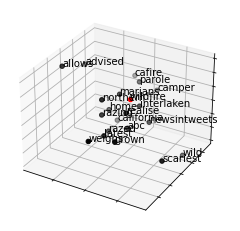

In [29]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

word = "wildfire"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in wv_model.wv.most_similar(word, topn=20)]
X = wv_model.wv[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [31]:
wv_model.wv.similarity(w1='wildfire', w2='scariest')

0.97442406

In [38]:
wv_model.wv.similarity(w1='wildfire', w2='happy')

0.73278683